# Inpainting methods
*   Biharmonic function
*   Custom methods
*   Diffusion model



In [1]:
# Google Drive setup
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Modules import

In [2]:
# Biharmonic function and custom methods
from skimage.restoration import inpaint
from skimage.morphology import dilation
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import skimage

# Diffusion
# import PIL
# import requests
# import torch
# from io import BytesIO

# !pip install diffusers["torch"] transformers
# from diffusers import StableDiffusionInpaintPipeline

## Getting picture and mask


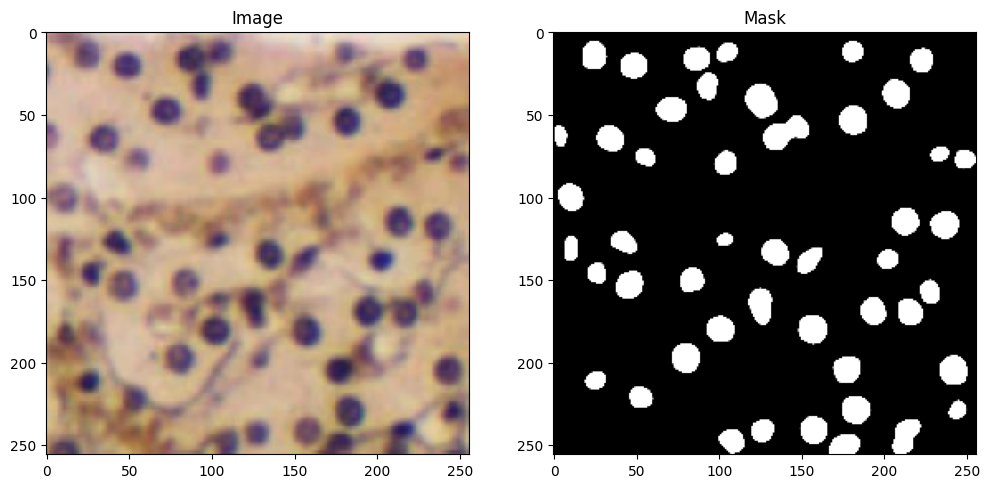

In [3]:
img_path = "/content/gdrive/MyDrive/Inpainting/pic_cell_nuclei.png"
mask_path = "/content/gdrive/MyDrive/Inpainting/mask.png"

image_cell_nuclei =  cv2.imread(img_path)
image_cell_nuclei = cv2.cvtColor(image_cell_nuclei, cv2.COLOR_BGR2RGB) # BGR to RGB conversion

mask_cell_nuclei = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_cell_nuclei)
axes[0].set_title("Image")
# axes[0].axis('off')
axes[1].imshow(mask_cell_nuclei, cmap="gray")
axes[1].set_title("Mask")
# axes[1].axis('off')
plt.show()

## Biharmonic function

In [4]:
def apply_dilation(mask, num_steps_dilation):
    for i in range(num_steps_dilation):
        mask = dilation(mask)

    return mask

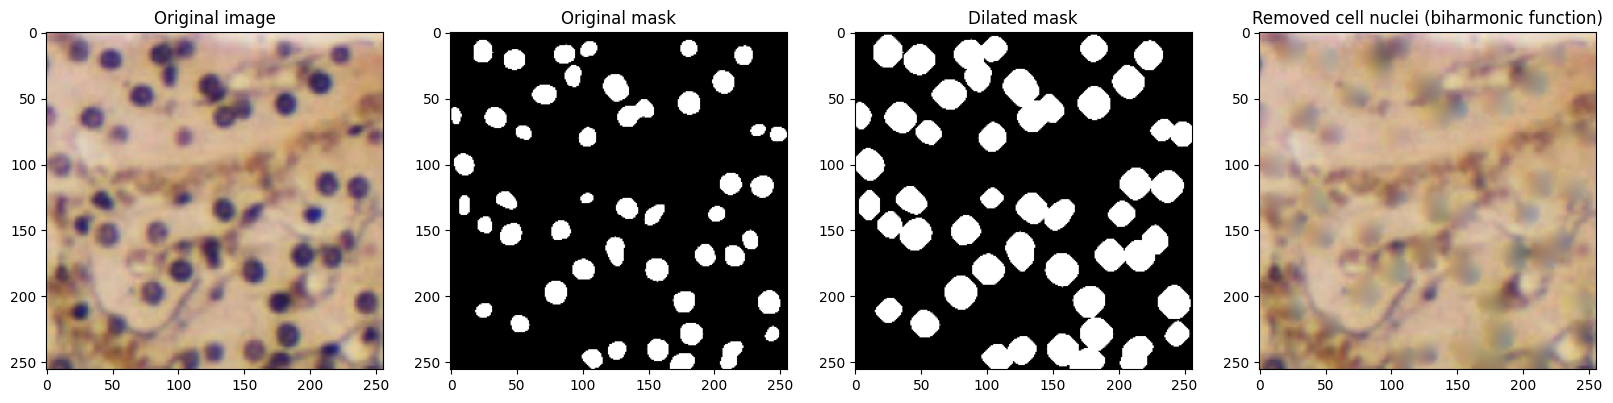

In [5]:
from skimage.restoration import inpaint

mask_dilated = apply_dilation(mask_cell_nuclei, 4)
img_removed_nuclei = inpaint.inpaint_biharmonic(image_cell_nuclei, mask_dilated, channel_axis=-1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))
ax1.imshow(image_cell_nuclei)
ax1.set_title('Original image')
# ax1.axis('off')
ax2.imshow(mask_cell_nuclei, cmap='gray')
ax2.set_title('Original mask')
# ax2.axis('off')
ax3.imshow(mask_dilated, cmap='gray')
ax3.set_title('Dilated mask')
# ax3.axis('off')
ax4.imshow(img_removed_nuclei)
ax4.set_title('Removed cell nuclei (biharmonic function)')
# ax4.axis('off')
plt.show()

In [7]:
plt.imsave("biharmonic.png", img_removed_nuclei)

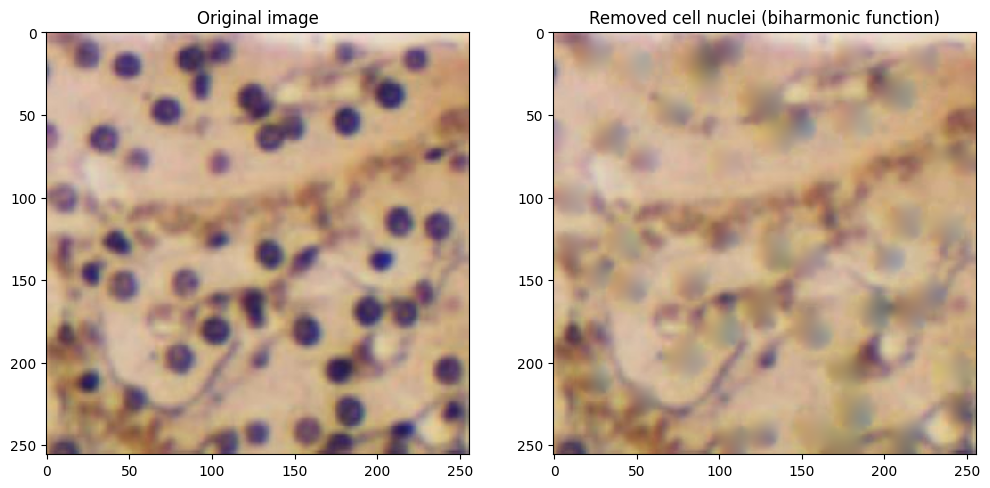

In [ ]:
from skimage.restoration import inpaint

mask_dilated = apply_dilation(mask_cell_nuclei, 4)
img_removed_nuclei = inpaint.inpaint_biharmonic(image_cell_nuclei, mask_dilated, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image_cell_nuclei)
ax1.set_title('Original image')
# ax1.axis('off')
# ax2.imshow(mask_cell_nuclei, cmap='gray')
# ax2.set_title('Original mask')
# ax2.axis('off')
# ax2.imshow(mask_dilated, cmap='gray')
# ax2.set_title('Dilated mask')
# ax3.axis('off')
ax2.imshow(img_removed_nuclei)
ax2.set_title('Removed cell nuclei (biharmonic function)')
# ax4.axis('off')
plt.show()

## Custom method 1

In [ ]:
mask_dilated = apply_dilation(mask_cell_nuclei, 1)
mask_diff = mask_dilated - mask_cell_nuclei
# plt.imshow(mask_diff, cmap="gray")
# plt.axis('off')

# plt.show()

In [ ]:
img_new = image_cell_nuclei.copy()
reds = img_new[:, :, 0][mask_diff == 1] # seznam pixelu okolo masky, barvy ktere se objevily kolem masek
greens = img_new[:, :, 1][mask_diff == 1]
blues = img_new[:, :, 2][mask_diff == 1]

mean_color = [np.mean(blues), np.mean(greens), np.mean(reds)] # prumerna barva
mean_color = np.mean(np.mean(img_new, axis = 1), axis = 0)
mean_color

array([178.68927002, 148.49787903, 128.31361389])

In [ ]:
img_new[mask_cell_nuclei > 0] = mean_color

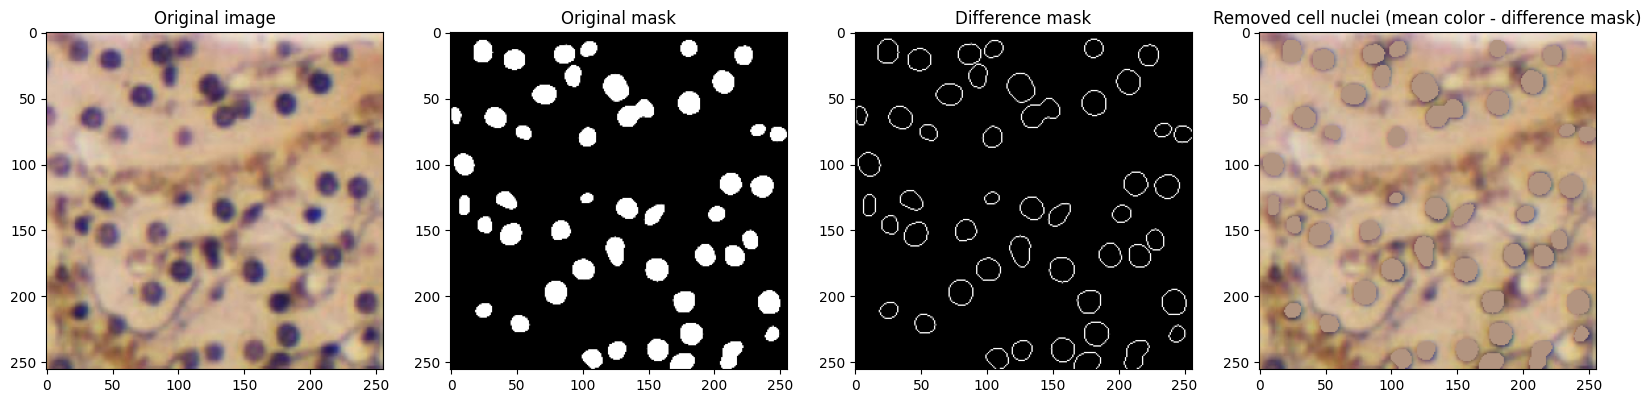

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))
ax1.imshow(image_cell_nuclei)
ax1.set_title('Original image')
# ax1.axis('off')
ax2.imshow(mask_cell_nuclei, cmap='gray')
ax2.set_title('Original mask')
# ax2.axis('off')
ax3.imshow(mask_diff, cmap='gray')
ax3.set_title('Difference mask')
# ax3.axis('off')
ax4.imshow(img_new)
ax4.set_title('Removed cell nuclei (mean color - difference mask)')
# ax4.axis('off')
plt.show()

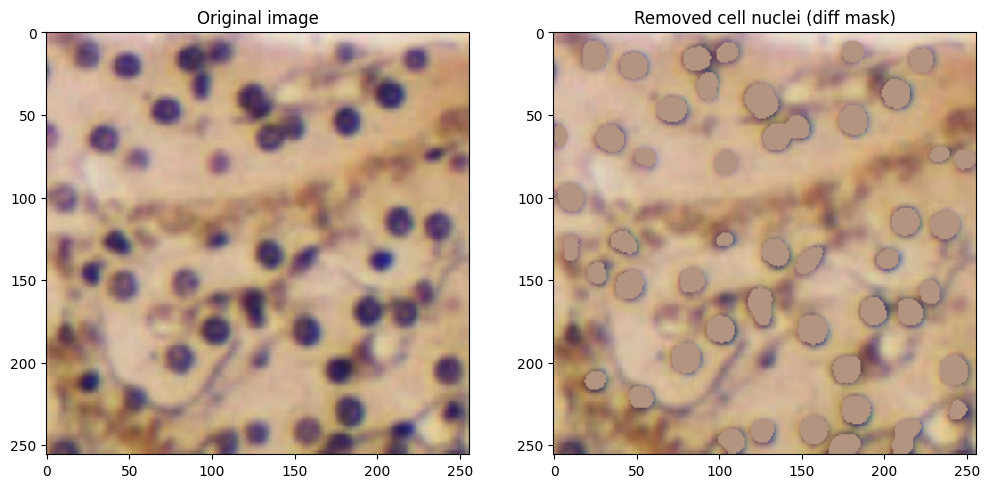

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image_cell_nuclei)
ax1.set_title('Original image')
# ax1.axis('off')
# ax2.imshow(mask_cell_nuclei, cmap='gray')
# ax2.set_title('Original mask')
# ax2.axis('off')
# ax2.imshow(mask_diff, cmap='gray')
# ax2.set_title('Difference mask')
# ax3.axis('off')
ax2.imshow(img_new)
ax2.set_title('Removed cell nuclei (diff mask)')
# ax4.axis('off')
plt.show()

## Custom method 2

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


(179, 149, 128)


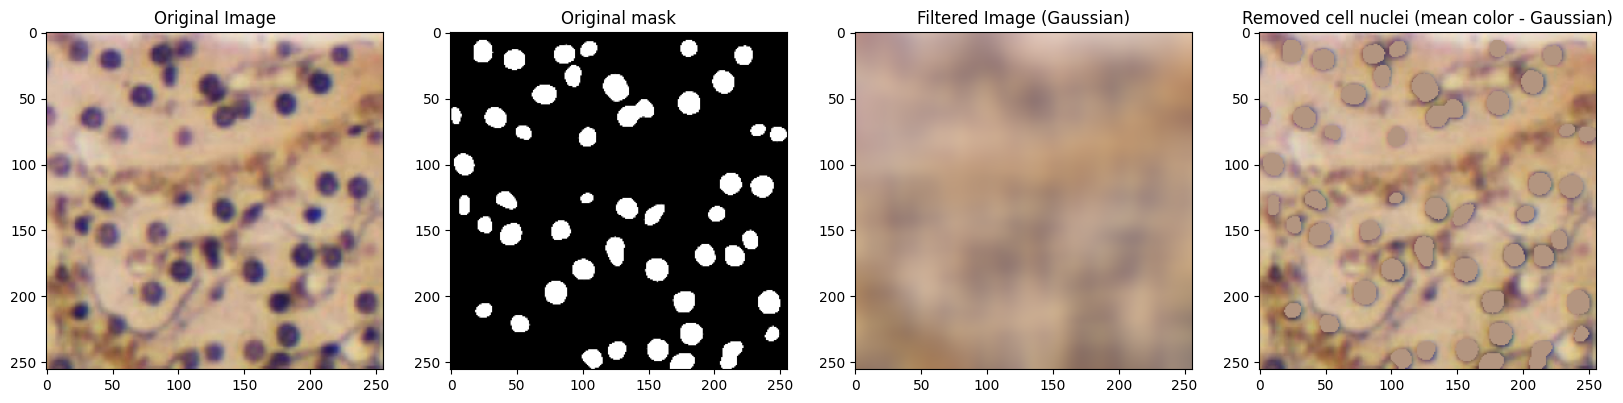

In [ ]:
img_new = image_cell_nuclei.copy()

# Blur image using Gaussian filter
gau_img = skimage.filters.gaussian(img_new, sigma=100, truncate=1/5)

# Separate RGB channels
# red_channel = gau_img[..., 0]
# green_channel = gau_img[..., 1]
# blue_channel = gau_img[..., 2]

red_channel = gau_img[:, :, 0]
green_channel = gau_img[:, :, 1]
blue_channel = gau_img[:, :, 2]

# Calculate average for each channel
average_red = np.mean(red_channel)
average_green = np.mean(green_channel)
average_blue = np.mean(blue_channel)

# Combine into a tuple representing average RGB color
mean_color = (int(average_red * 255), int(average_green * 255), int(average_blue * 255))
print(mean_color)

img_new[mask_cell_nuclei > 0] = mean_color


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))
ax1.imshow(image_cell_nuclei)
ax1.set_title('Original Image')
# ax1.axis('off')
ax2.imshow(mask_cell_nuclei, cmap='gray')
ax2.set_title('Original mask')
# ax2.axis('off')
ax3.imshow(gau_img)
ax3.set_title('Filtered Image (Gaussian)')
# ax3.axis('off')
ax4.imshow(img_new)
ax4.set_title('Removed cell nuclei (mean color - Gaussian)')
# ax4.axis('off')
plt.show()

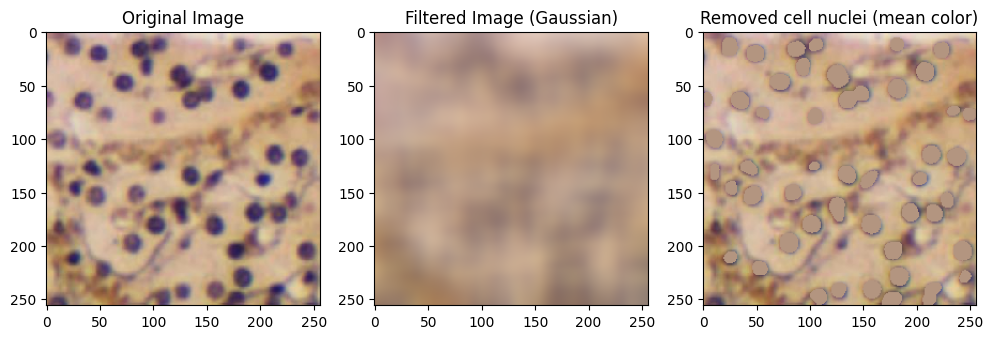

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.imshow(image_cell_nuclei)
ax1.set_title('Original Image')
# ax1.axis('off')
# ax2.imshow(mask_cell_nuclei, cmap='gray')
# ax2.set_title('Original mask')
# ax2.axis('off')
ax2.imshow(gau_img)
ax2.set_title('Filtered Image (Gaussian)')
# ax3.axis('off')
ax3.imshow(img_new)
ax3.set_title('Removed cell nuclei (mean color)')
# ax4.axis('off')
plt.show()

## Diffussion model

In [ ]:
pipeline = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
)
pipeline = pipeline.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

text_encoder/model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

In [ ]:
mask_dilated = apply_dilation(mask_cell_nuclei, 4)

init_image = PIL.Image.fromarray(image_cell_nuclei).resize((512, 512))
mask_image = PIL.Image.fromarray(mask_dilated).resize((512, 512))
mask_cell_nuclei = PIL.Image.fromarray(mask_cell_nuclei).resize((512, 512))

# img_cell_nuclei = "https://github.com/janburian/Masters_thesis/blob/main/graphics/orig_image_cell_nuclei.jpg?raw=true"
# mask_cell_nuclei = "https://github.com/janburian/Masters_thesis/blob/main/graphics/mask_orig_image_cell_nuclei.jpg?raw=true"

# image = download_image(img_cell_nuclei).resize((512, 512))
# mask_image = download_image(mask_cell_nuclei).resize((512, 512))

In [ ]:
import requests
from io import BytesIO

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
# prompt = "blurred, unclear, fuzzy, hazy, indistinct, blurry, opaque, unidentifiable, invisible, hidden"
prompt = " "

guidance_scale=15
num_samples = 5
generator = torch.Generator(device="cuda").manual_seed(0) # change the seed to get different results

images = pipeline(
    prompt=prompt,
    image=init_image,
    mask_image=mask_image,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

# image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
# plt.imshow(image)
# plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


In [ ]:
# insert initial image in the list so we can compare side by side
images.insert(0, init_image)

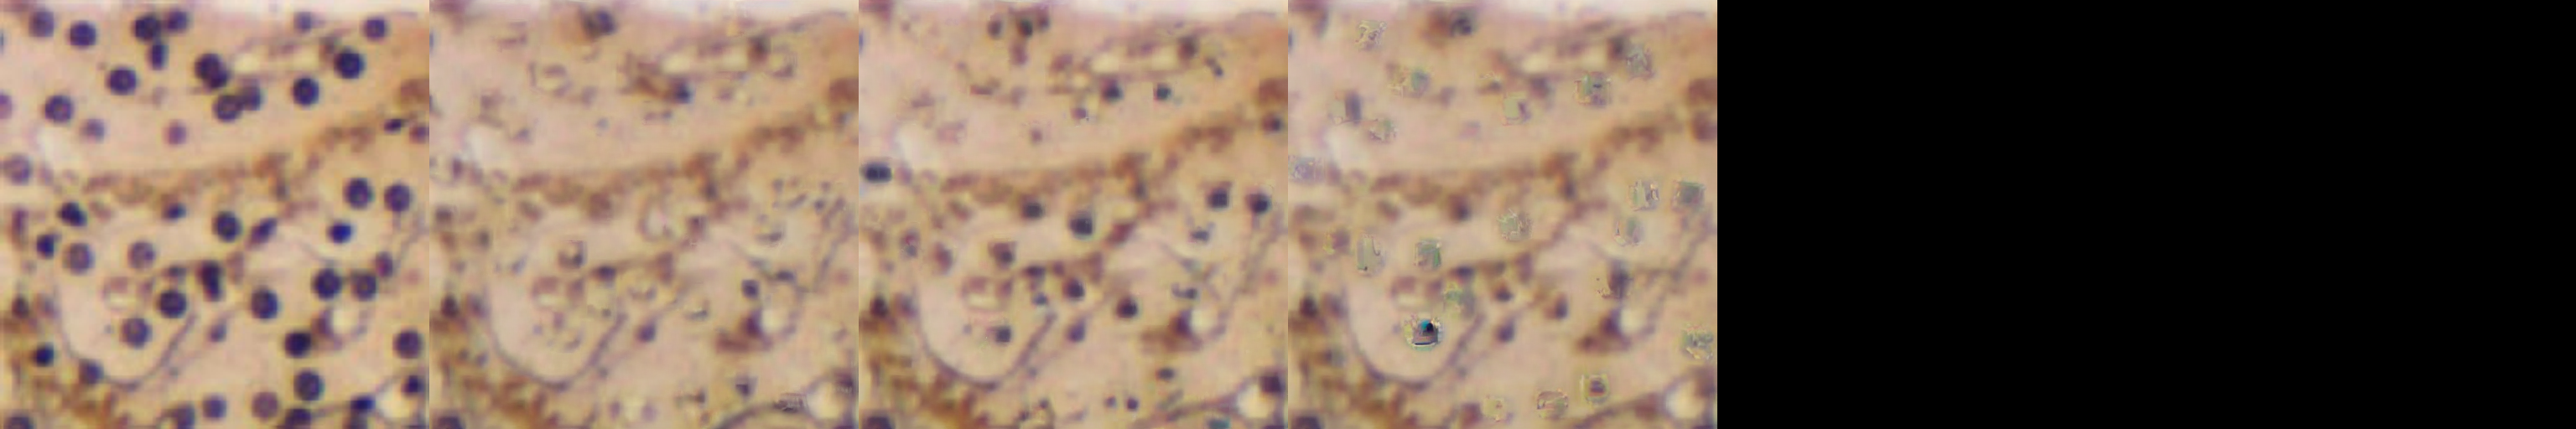

In [ ]:
image_grid(images, 1, num_samples + 1)

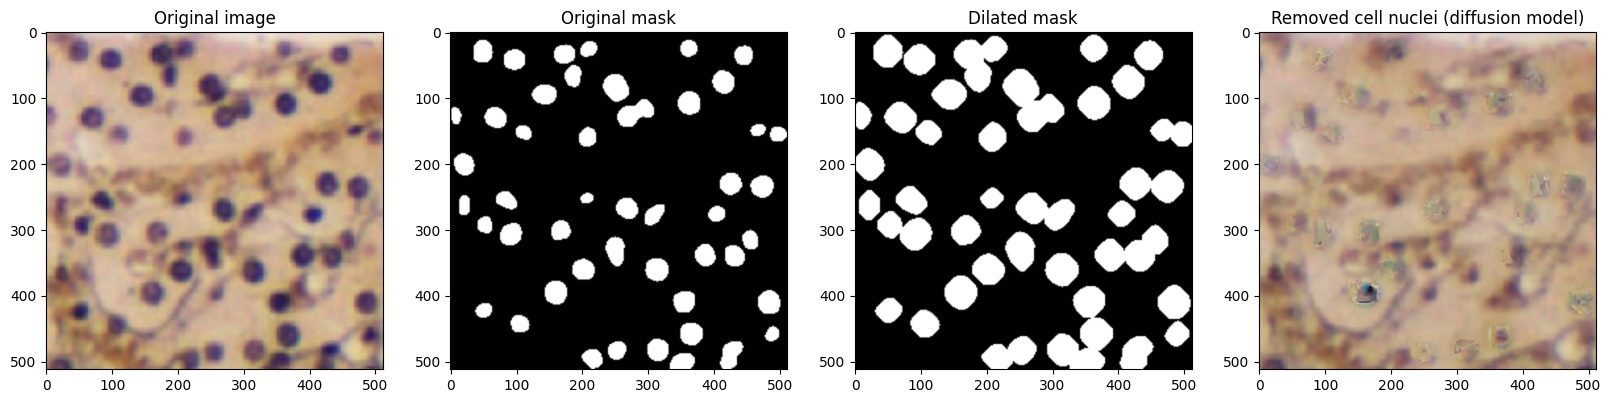

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))
ax1.imshow(images[0])
ax1.set_title('Original image')
# ax1.axis('off')
ax2.imshow(mask_cell_nuclei, cmap='gray')
ax2.set_title('Original mask')
# ax2.axis('off')
ax3.imshow(mask_image, cmap='gray')
ax3.set_title('Dilated mask')
# ax3.axis('off')
ax4.imshow(images[3])
ax4.set_title('Removed cell nuclei (diffusion model)')
# ax4.axis('off')
plt.show()

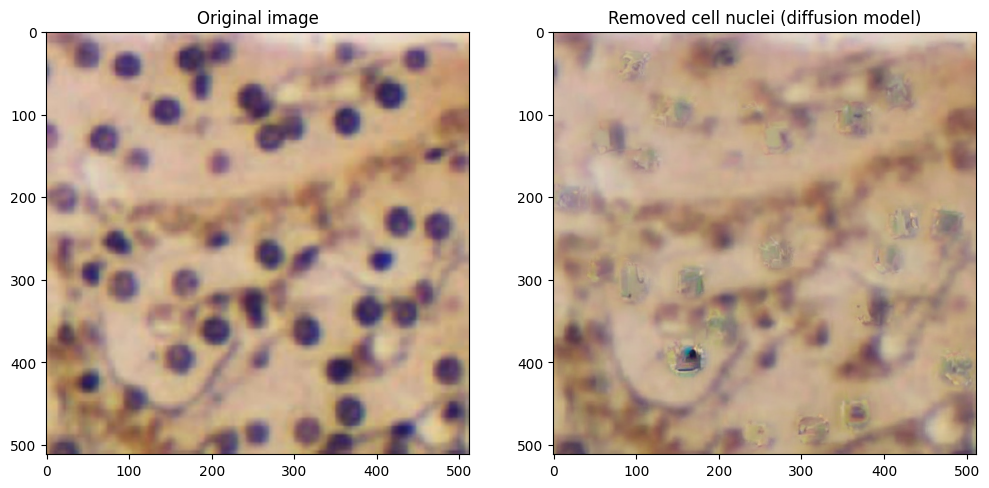

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(images[0])
ax1.set_title('Original image')
# ax1.axis('off')
# ax2.imshow(mask_cell_nuclei, cmap='gray')
# ax2.set_title('Original mask')
# ax2.axis('off')
# ax2.imshow(mask_image, cmap='gray')
# ax2.set_title('Dilated mask')
# ax3.axis('off')
ax2.imshow(images[3])
ax2.set_title('Removed cell nuclei (diffusion model)')
# ax4.axis('off')
plt.show()